In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [3]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images (values between 0 and 1)
train_images = train_images / 255.0
test_images = test_images / 255.0


In [4]:
def build_model_without_dropout():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
        layers.Dense(128, activation='relu'),  # Fully connected layer
        layers.Dense(64, activation='relu'),   # Another fully connected layer
        layers.Dense(10, activation='softmax') # Output layer for classification
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [8]:
def build_model_with_dropout(p):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(p),  # Apply dropout with a rate of 0.5
        layers.Dense(64, activation='relu'),
        layers.Dropout(p),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [9]:
# Training the model without dropout
model_without_dropout = build_model_without_dropout()
history_without_dropout = model_without_dropout.fit(
    train_images, train_labels, epochs=10, 
    validation_data=(test_images, test_labels)
)

# Training the model with dropout
model_with_dropout0 = build_model_with_dropout(0.5)
model_with_dropout1 = build_model_with_dropout(0.2)
model_with_dropout2 = build_model_with_dropout(0.8)
model_with_dropout3 = build_model_with_dropout(0.1)
history_with_dropout0 = model_with_dropout0.fit(
    train_images, train_labels, epochs=10, 
    validation_data=(test_images, test_labels)
)
history_with_dropout1 = model_with_dropout1.fit(
    train_images, train_labels, epochs=10, 
    validation_data=(test_images, test_labels)
)
history_with_dropout2 = model_with_dropout2.fit(
    train_images, train_labels, epochs=10, 
    validation_data=(test_images, test_labels)
)
history_with_dropout3 = model_with_dropout3.fit(
    train_images, train_labels, epochs=10, 
    validation_data=(test_images, test_labels)
)



c:\Users\disha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8742 - loss: 0.4252 - val_accuracy: 0.9589 - val_loss: 0.1277
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9691 - loss: 0.1025 - val_accuracy: 0.9685 - val_loss: 0.0989
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9795 - loss: 0.0658 - val_accuracy: 0.9753 - val_loss: 0.0813
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9846 - loss: 0.0485 - val_accuracy: 0.9747 - val_loss: 0.0852
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9869 - loss: 0.0402 - val_accuracy: 0.9764 - val_loss: 0.0836
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9896 - loss: 0.0311 - val_accuracy: 0.9757 - val_loss: 0.0865
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9906 - loss: 0.0293 - val_accuracy: 0.9775 - val_loss: 0.0813
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9915 - loss: 0.0236 - 

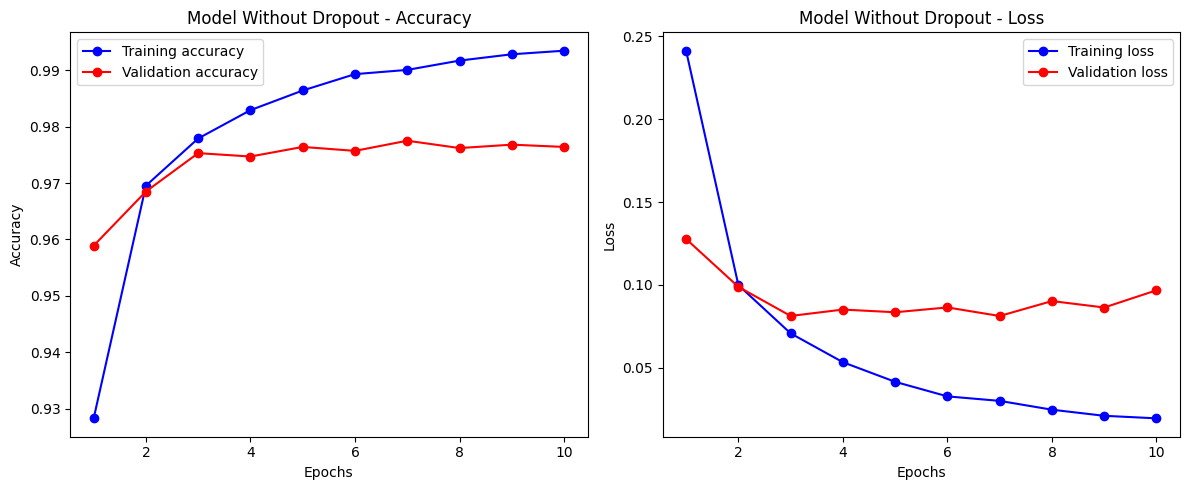

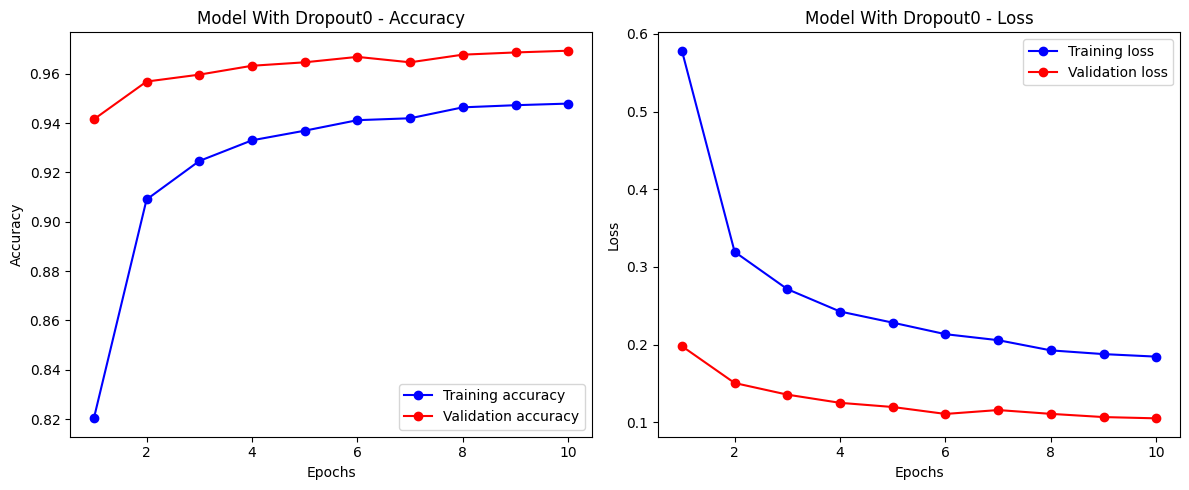

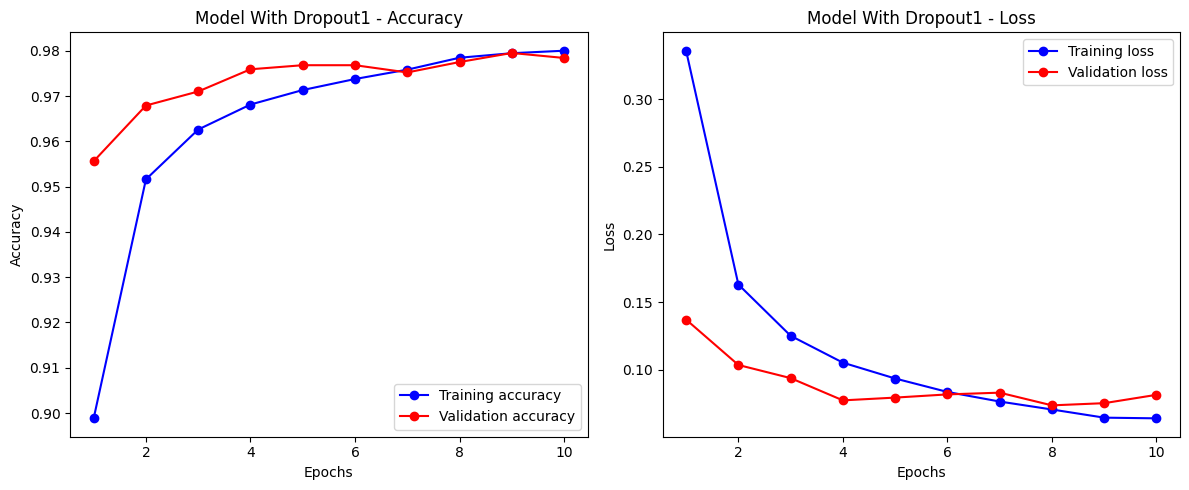

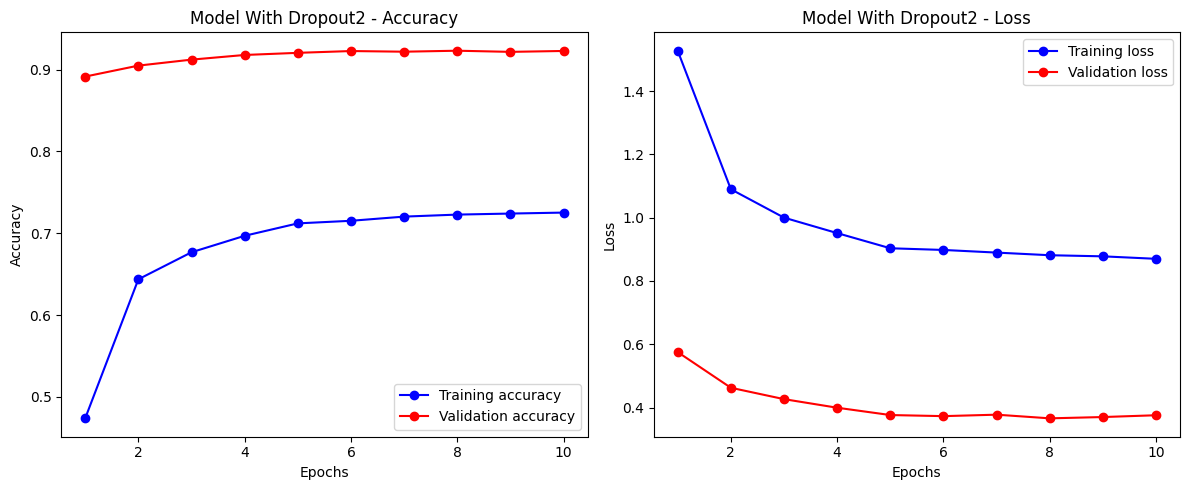

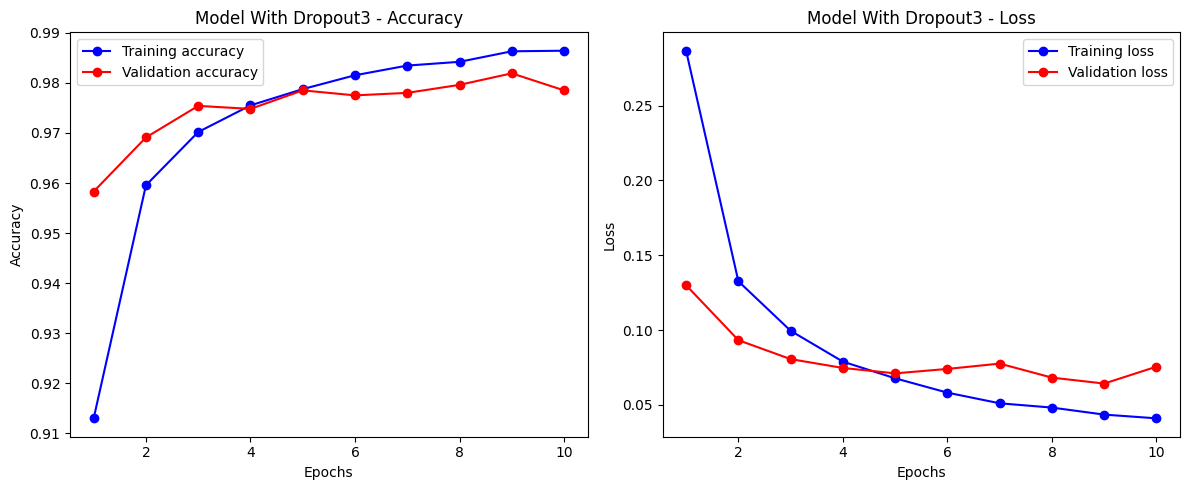

In [10]:
# Function to plot accuracy and loss
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot for model without dropout
plot_history(history_without_dropout, 'Model Without Dropout')

# Plot for model with dropout
plot_history(history_with_dropout0, 'Model With Dropout0')
plot_history(history_with_dropout1, 'Model With Dropout1')
plot_history(history_with_dropout2, 'Model With Dropout2')
plot_history(history_with_dropout3, 'Model With Dropout3')
